<a href="https://colab.research.google.com/github/Sarasswati/playStore-data-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mount to drive where file is located
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read csv to dataframe
store_data = '/content/drive/MyDrive/Colab Notebooks/Capstone Project'
store_df = pd.read_csv(store_data + '/Play Store Data.csv')

userReview_df = pd.read_csv(store_data + '/User Reviews.csv')

In [ ]:
#information about playstore DataFrame
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# copying store_df to store_df2
store_df2 = store_df.copy()

# **Cleaning the Category Data**

In [ ]:
# get unique value of category
store_df2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
#Checking row to category containing 1.9 value
store_df2[store_df2['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# by using it index value making category NaN
store_df2.loc['10472'] = store_df2.loc[10472].shift()
store_df2['App'].loc['10472'] = store_df2['Category'].loc['10472']
store_df2['Category'].loc['10472'] = np.nan
store_df2.loc['10472']

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [ ]:
#Checking unique again after changing to NaN
store_df2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9', nan], dtype=object)

# **Visualization on Category according to data**

Text(0.5, 0, 'All Categories')

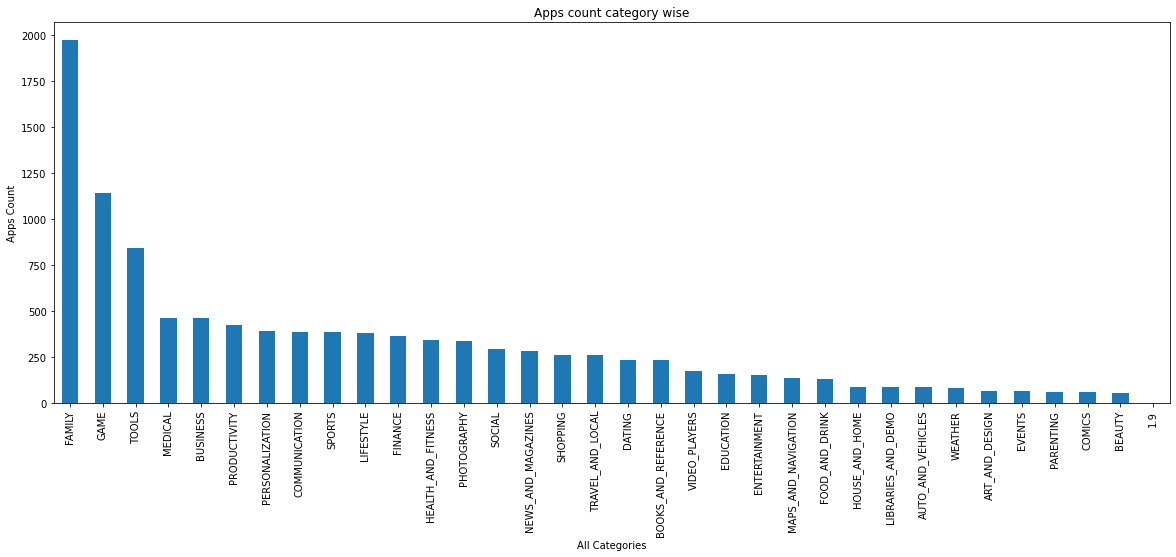

In [ ]:
category = store_df2['Category'].value_counts()
plt.rcParams['figure.figsize'] = (20, 7)
category.plot(kind='bar')
plt.title('Apps count category wise')
plt.ylabel('Apps Count')
plt.xlabel('All Categories')

# **Cleaning Installs Data**

In [ ]:
# Getting unique value of Install columnn
store_df2['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
# Cleaning the value by replacing '+' with ''
store_df2['Installs'] = store_df2.Installs.str.replace('+','')
# Cleaning the value by replacing ',' with ''
store_df2['Installs'] = store_df2.Installs.str.replace(',','')
# Cleaning the value by replacing string 'Free' with NaN
store_df2['Installs'] = store_df2.Installs.replace("Free",'0')
# Converting object to float type
store_df2['Installs'] = store_df2['Installs'].astype(float)
store_df2['Installs'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

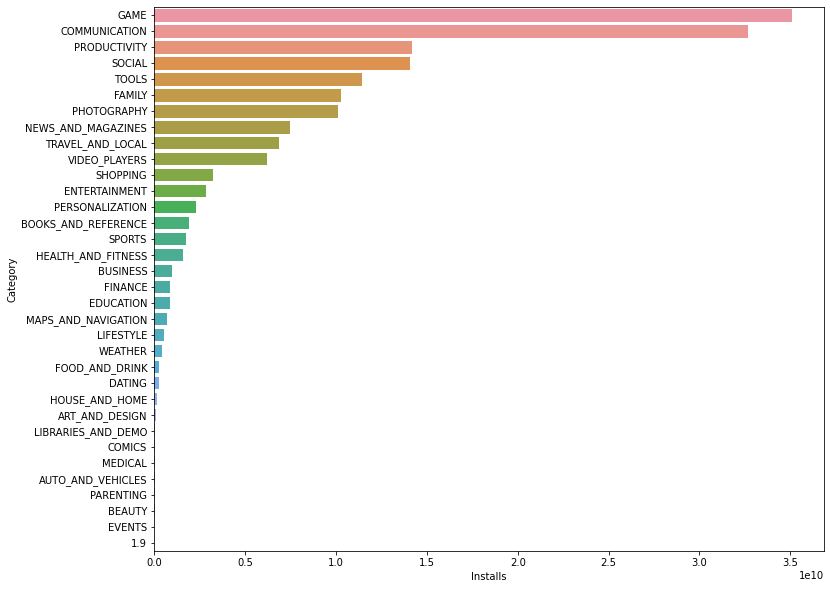

In [ ]:
plt.figure(figsize=(12,10))
install = store_df2.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=install, y=install.index, data=store_df2)

# **Cleaning Reviews Data**

In [ ]:
# getting unique value of Reviews
store_df2['Reviews'].unique()

array(['159', '967', '87510', ..., '1195', '398307', 19.0], dtype=object)

In [ ]:
# getting value of reviews having value 3.0M
store_df2[store_df2['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",0.0,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Cleaning the review data using replace
store_df2['Reviews'] = store_df2.Reviews.replace("0.0",0)
store_df2['Reviews'] = store_df2.Reviews.replace("3.0M",3000000.0)
store_df2['Reviews'] = store_df2['Reviews'].astype(float)
store_df2['Reviews'].dtype

dtype('float64')

# **Visualization Review on category wise**

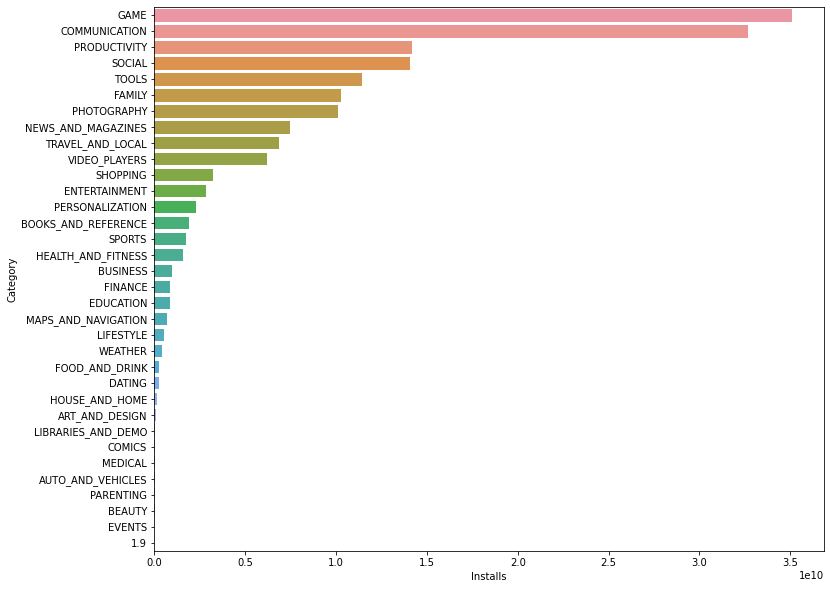

In [ ]:
plt.figure(figsize=(12,10))
sum_rew = store_df2.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
sns.barplot(x=install, y=install.index, data=store_df2)

# **Cleaning Rating Data**

In [ ]:
# Getting unique of Rating column
store_df2['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, 19.0, '1.9'], dtype=object)

In [ ]:
# Converting Rating to Numneric type
store_df2['Rating'] = pd.to_numeric(store_df2['Rating'])
store_df2['Rating'].dtype
store_df2['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

# **Visualization on Rating on Category**

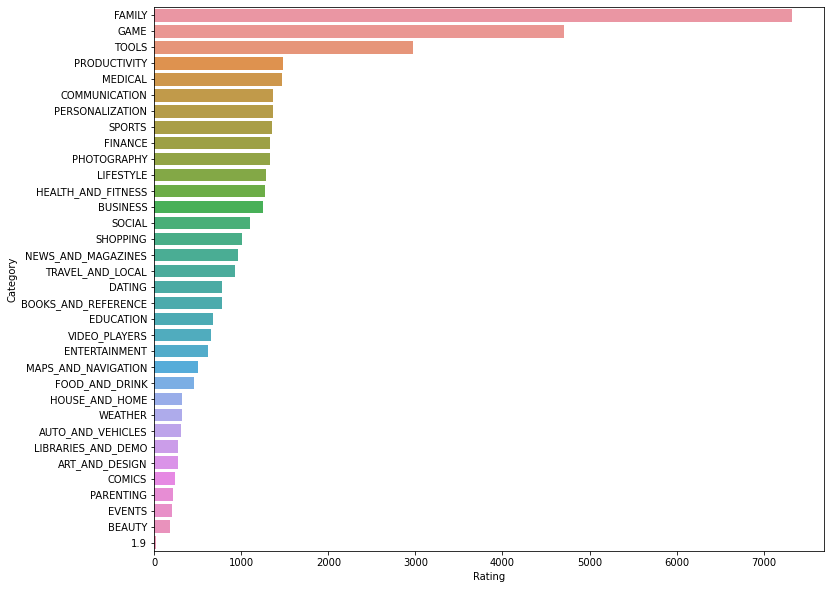

In [ ]:
plt.figure(figsize=(12,10))
rating = store_df2.groupby(['Category'])['Rating'].sum().sort_values(ascending=False)
sns.barplot(x=rating, y=rating.index, data=store_df2)

# **Cleaning Price Data**

In [ ]:
# Getting unique value of Prive columns
store_df2['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
# Removing '$', 'Everyone' string and converting object to float type
store_df2['Price'] = store_df2.Price.str.replace('$','')
store_df2['Price'] = store_df2.Price.replace('Everyone',np.nan)
store_df2['Price'] = store_df2['Price'].astype(float)
store_df2['Price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')